In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.simplefilter("ignore")

In [3]:
df=pd.read_csv("CleanedLoanData.csv")

In [9]:
df.head()

,person_age,person_education,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status,person_gender_male,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,previous_loan_defaults_on_file_Yes
0,0.400888,3,7.116215,0,44.928204,16.02,0.181480,3.0,561,1,False,False,False,True,False,False,False,True,False,False
1,0.400869,2,6.401416,0,17.192952,11.14,0.064705,2.0,504,0,False,False,True,False,True,False,False,False,False,True
2,0.400930,2,6.406924,3,27.675832,12.87,0.175681,3.0,635,1,False,False,False,False,False,False,True,False,False,False
3,0.400904,0,7.154530,0,44.928204,15.23,0.175681,2.0,675,1,False,False,False,True,False,False,True,False,False,False
4,0.400918,3,7.084614,1,44.928204,14.27,0.185389,4.0,586,1,True,False,False,True,False,False,True,False,False,False


In [23]:
contnious=["person_age","person_income","loan_amnt","loan_int_rate","loan_percent_income",
          "credit_score"]

In [7]:
x=df.drop("loan_status",axis=1)
y=df["loan_status"]

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=77)

In [27]:
from sklearn.preprocessing import StandardScaler
sfc=StandardScaler()
x_train[contnious]=sc.fit_transform(x_train[contnious])
x_test[contnious]=sc.fit_transform(x_test[contnious])

In [33]:
from sklearn.linear_model import LogisticRegression

#Model
model=LogisticRegression(random_state=77)
model.fit(x_train,y_train)

# Prediction
ypredTrain=model.predict(x_train)
ypredTest=model.predict(x_test)

#Accuracy
from sklearn.metrics import accuracy_score
TrainAccuracy=accuracy_score(y_train,ypredTrain)
TestAccuracy=accuracy_score(y_test,ypredTest)

#CrossVal
from sklearn.model_selection import cross_val_score
TrainCV=cross_val_score(model,x_train,y_train,cv=5,scoring="accuracy").mean()

#print
print("TrainAccuracy: ",TrainAccuracy," ","TestAccuracy: ",TestAccuracy," ","TrainCV",TrainCV)

TrainAccuracy:  0.8943771530170019   TestAccuracy:  0.894877208578731   TrainCV 0.8942103764411724


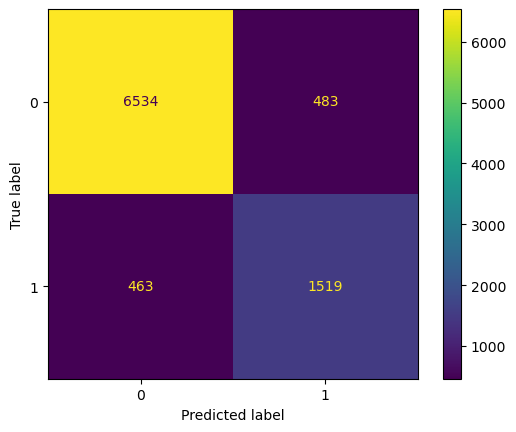

In [39]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,ypredTest)
cmd=ConfusionMatrixDisplay(cm).plot()
cmd

In [47]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
fpr,tpr,thershold=roc_curve(y_test,ypredTest)

In [59]:
roc_auc=auc(fpr,tpr)
roc_auc

0.8487823718295786

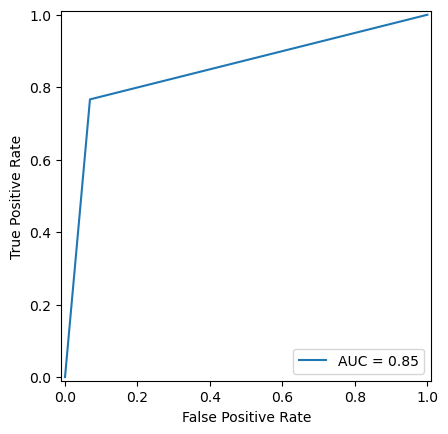

In [63]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()

In [55]:
roc_auc_score(y_test,ypredTest)

0.8487823718295786